<a href="https://www.kaggle.com/code/therealoise/heart-disease-prediction-lr-rfc?scriptVersionId=106128809" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

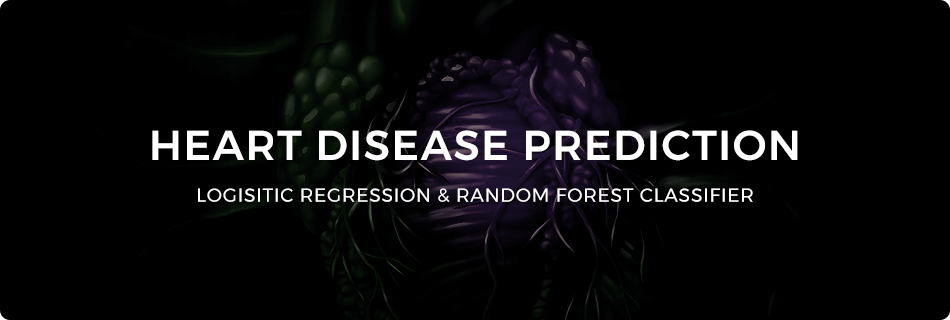

## 1. INTRODUCTION
Heart disease refers to a variety of heart conditions, the most prevalent being the **coronary artery disease**, which affects blood flow to the heart. According to a recent article published by [**the Heart Foundation**](https://theheartfoundation.org/heart-disease-facts-2/), heart disease is the leading cause of death in the United States where there are 720,000 new attacks and 335,000 recurrent attacks annually. Several factors such as high serum cholesterol, high blood pressure, etc., are known to put people at a higher risk for heart disease. This project will create a machine learning model that can predict whether or not someone has heart disease based on a number of attributes.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">1.1. PROBLEM DEFINITION/GOAL</h4>
 
* The problem we'll be exploring is a binary classification problem given that there are two class labels.
* The goal is to reach an accuracy of 96% at predicting whether or not someone has heart disease based on the various features provided.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">1.2. DATA SOURCE</h4>
    
The original data is made available by [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from the Cleveland database. However, the data has already been formatted and made available on [**Kaggle**](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci/metadata). Out of the 76 attributes contained in the database, a subset of 14 attributes will be used, which will be split into **X** (the first 13 attributes), and **y** (the predictive attribute). 

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">1.3. FEATURES</h4>

**Feature List**: `age`, `sex`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal`, and `target`.

#### Data Dictionary:
* **age**: The lenght of time in years the respondent has lived
* **sex**: Either of the two main categories, **male** or **female** (male=1; female=0). 
* **cp**: Chest pain type (4 values) <br>
0: Typical Angina - Chest pain caused by physical exertion or emotional stress<br>
1: Atypical angina - A type of chest pain resulting from respiratory, gastrointestinal or musculoskeletal diseases<br>
2: Non-anginal pain - A recurring pain in the chest that occurs usually near the heart, but not heart-related<br>
3: Asymptomatic: A silent heart atack that has few or no symptoms or symptoms not recognized as heart attack.
* **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital). Normal resting blood pressure globally is approximately 127mg over 79mmHg in men and 122mmHg over 77mmHg in women.
* **chol**: serum cholesterol in mg/dl. Normal serum cholesterol should fall between a total of 125 to 200mg/dL. Anything above this range is abnormal.
* **fbs**: fasting blood sugar(2 values). Above 120 mg/dL indicates that one has prediabetes. fbs>120 mg/dL(1=true, 0=false).
* **restecg**: Resting electrocardiographic results(3 values) This non-invasive test can identify anomalies such as arrhythmias, signs of coronary heart disease, left ventricular hypertrophy, and bundle branch blockage. [**Reference**](https://www.ncbi.nlm.nih.gov/books/NBK367910/#:~:text=Resting%2012%2Dlead%20electrocardiography%20(ECG,hypertrophy%20and%20bundle%20branch%20blocks.) <br>
0: Normal<br>
1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression greater than 0.05 mV)<br>
2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach**: An individual's maximum heart rate. There are many [factors](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979#:~:text=A%20normal%20resting%20heart%20rate%20for%20adults%20ranges%20from%2060,to%2040%20beats%20per%20minute.) that can affect heart rate such as age, cardiovascular disease, cholesterol level etc. Despite the vast range of normal heart rates, an abnormally high or low heart rate may signal an underlying problem.
* **exang**: This is also known as a stable angina. It usually occurs after some exertion like body exercise and normally goes away after some qulaity rest or medication. There are two values in this column(1=yes, 0=no).
* **oldpeak**: ST depression induced by exercise relative to rest.
* **slope**: The slope of the exercise ST segment. It has 3 values<br>
0: Upsloping<br>
1: Flat<br>
2: Downsloping
* **ca**: number of major vessels (0-3) colored by flourosopy
* **thal**: The Thallium stress test measures how efficiently blood flows into the heart during exercise or rest. [**Reference**](https://www.healthline.com/health/thallium-stress-test)<br>
1,3: normal<br>
6: fixed defect<br>
7: reversable defect
* **target**: The predicted attribute. Indicates whether the respondent has disease or not. (yes=1 and no=0)

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">1.4. PROJECT SCOPE</h4>

* We'll start with **Exploratory Data Analysis (EDA)** where we will spend a little bit of time understanding and visualizing our data.<br>
* Next we will fit our models using **Logistic Regression** and **Random Forest Classifier**.<br>
* Our models will be tuned using the **RandomizedSearchCV** and **GridSearchCV**.<br>
* To evaluate our model we will use **ROC curve** and **AUC score**, **confusion matrix**, and **classification report**.<br> 
* We'll use **cross_val_score()** to calculate the accuracy, precision, recall, and f1-score of our model.<br>
* Lastly, we'll use **feature importance** to know which feature contributed the most to the prediction we got from our chosen model.

## 2. EXPLORATORY DATA ANALYSIS (EDA)

With the use of summary statistics and graphical representations, we want to get a better understanding of our data by conducting preliminary studies in order to identify trends, identify outliers, test hypotheses, and verify hypotheses. 

**EDA CHECKLIST**
* View the data details
* View the first 5 and last 5 rows of the dataframe
* View qualitative measures of the data
* Check for missing values
* Normalize the data
* Visualize the data by creating scatterplots, bar charts and heatmap.
* Checking to see if there's something that needs to be added, changed, or removed to get more out of the data.

But before we proceed, let's start by preparing the tools we'll need.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.1. PREPARING THE TOOLS</h4>
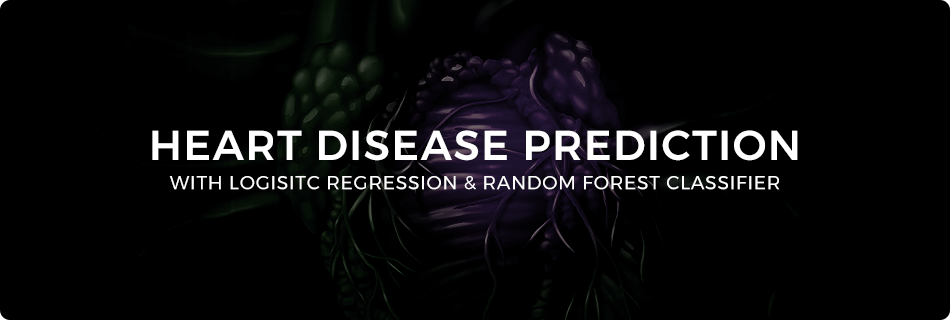

In [1]:
%matplotlib inline

#Importing regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Loading Model evaluators
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import plot_roc_curve

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.2. DATA PREPARATION AND INITIAL ANALYSIS</h4>

In [2]:
# Loading Data

df = pd.read_csv("../input/heart-disease/heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Double check if there are any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#View qualitative measures of the data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


As we already established, the target column only has a set of 2 values(1 and 0), where 1 means that the patient has heart disease, and 0 means the patient does not have heart disease. 

Let's see how many positive values(1) and negative values (0) are in our target column. 

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Let's also get the percentage of the target value, which I believe will give us a better view of how balanced the values are. We will do this by setting normalize to `True`.

In [9]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

#### SUMMARY OF INITIAL FINDINGS
* There are 303 rows, meaning there are 303 enteries, and 14 columns. 
* Out of the 303 enteries, 165 has heart disease, and 138 don't. 
* Looking at the normalized value count, we can see that the traget column is balanced, which is good because a balanced data provides the same amount of information to predict each class and, as a result, provides a clearer picture of how to respond to test data [**Reference**](https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0).
* From the info details, we can see that there are no missing values in the dataset<br>

Next we'll start by comparing different columns with each other to find patterns in our data. With this, we can see the relationship between the features and the target variable.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.3. HEART DISEASE FREQUENCY BASED ON GENDER</h4>

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Here we can see that there are 207 males and 96 females. 

Next, let's compare the target column with the sex column, using the `crosstab()` funct

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Here we can see that out of the 96 women present in the study, 72 (75%) of them have heart disease, while 24 (25%) of them don't. And out of the 207 men in the study, 114 (55%) of them have heart disease and 93 (45%) of them don't. This shows that women are more likely than men to die from heart failure and heart attacks.

If we take the average of both positives and negatives, we can roughly assume that an individual (male or female) has a 65% chance of having a heart disease, and 35% chance of not. We can use this as our `baseline`.

**BAR CHART OF OUR CROSSTAB VALUE**<br>
With this bar chart, we can have a clearer picture of variations in our data.

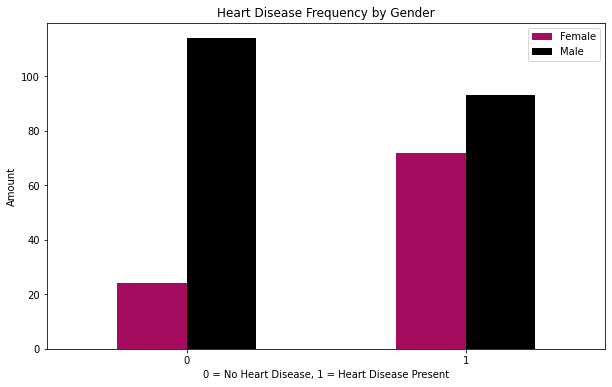

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["#a50b5e", "black"])

plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease Present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.4. COMPARING CHOL, AGE, AND THALAC TO THE TARGET</h4>

Using a scatter plot, we will compare the age of the participants, their serum cholesterol, and thalac (maximum heart rate) with the target variable. 

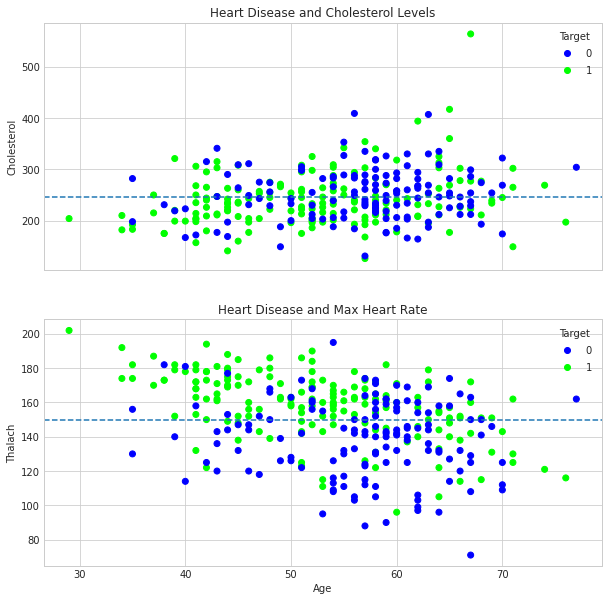

In [13]:
plt.style.use('seaborn-whitegrid')

# Subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=df["age"],
                     y=df["chol"],
                     c=df["target"],
                     cmap="brg")
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(y=df["chol"].mean(),
           linestyle="--");


scatter = ax1.scatter(x=df["age"],
                     y=df["thalach"],
                     c=df["target"],
                     cmap="brg")
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Thalach")

ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(y=df["thalach"].mean(),
           linestyle="--");

From this scatterplot, there appears to be a positive correlation between **serum cholesterol** and **age**. Whereas, we see a negative correlation between maximum **heart rate** and **age**. Meaning, as age increased, the heart rate decreased. 

Also, the blue dots (No heart disease) seemed to increase with age which seemed a bit off. To have a clear idea of what's actually going on, let's have a distribution of the age using a **density plot**.

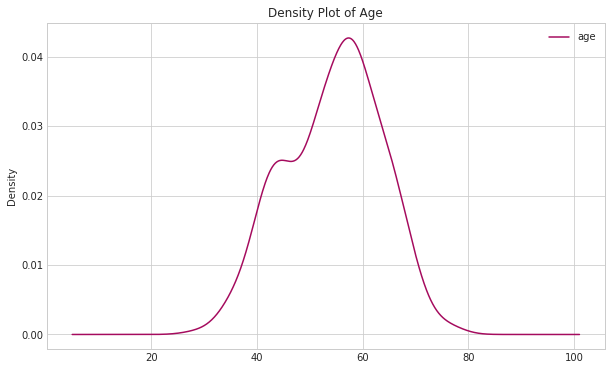

In [14]:
pd.DataFrame(df['age']).plot(kind='density', figsize=(10, 6), 
                             color=['#a50b5e'])

plt.title("Density Plot of Age")
plt.show()

This density plot explains the reason for our result in the scatterplot. Even though this is a normal distribution, we can see that the vast majority of the patients fall between the ages of 45 and 65.
<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.4. COMPARING CP (CHEST PAIN) TO THE TARGET</h4>

Here we will see if chest pain relates to whether someone has heart disease or not. Let's start by comparing the `target` column with the `cp` column, using the `crosstab` function.

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Let's do a quick plot to have a better feel of our crosstab data.

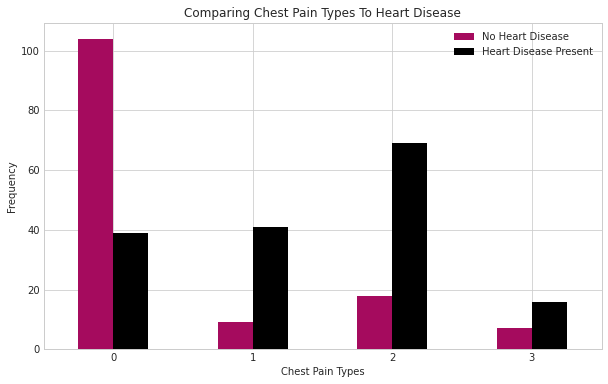

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                   figsize=(10, 6), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing Chest Pain Types To Heart Disease")
plt.xlabel("Chest Pain Types")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

Looking at this chart, we can see that for the participants whose chest pain is caused by physical exertion or emotional stress (i.e **Typical Angina**(0)), 104 of them do not have heart diease while 39 of them do, which is understandable.

For those whose chest pain was caused as a result of respiratory, gastrointestinal or musculosketal disease (i.e **Atypical Angina**(1)), 41 of them have heart disease and 9 of them don't.

Interestingly, those whose chest pain is not heart-related (i.e **Non-anginal** (2)), are seen to have the highest number of participants with heart disease (69) compared to the rest. This could be as a result of misdiagnosis. Asking patients questions to primarily diagnose a chest pain as nonanginal can sometimes be very misleading. According to Constant, J(1983), "it is easily forgotten that the patient may have more than one pain, only one of which may be anginal, yet the patient may not separate them when answering your questions" **[Reference](https://onlinelibrary.wiley.com/doi/pdf/10.1002/clc.4960060102)**.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.5. CORRELATION MATRIX</h4>

Let's see how the independent variables interact with each other. To do this, we'll use the `corr` function.

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Let's visualize our correlation matrix using seaborn's heatmap.

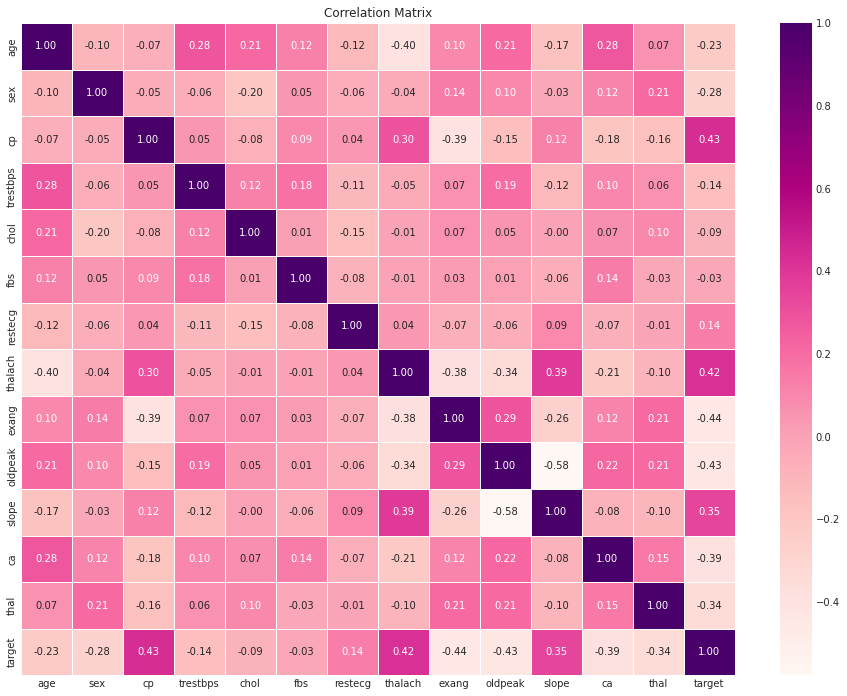

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdPu")

ax.set_title('Correlation Matrix');

**SUMMARY**
* The features with the highest positive correlation to the `target` variable are: `cp`: 0.43, `thalach`: 0.42, and `slope`: 0.35.
* The features with the highest negative correlation to the `target` variable are: `exang`: -0.44, `oldpeak`: -0.43, `ca`: -0.39, and `thal`: -0.34. 
* We can also see a positive correlation between `restecg` and `target`. However, since there are 3 values in the `restecg` data, let's do a more detailed comparism of both features.

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">2.6. COMPARING RESTECG TO TARGET</h4>

Lastly, let's see the relationship between `restecg` (resting electrocardiography) and heart disease. This treatment is used to evaluate known cardiovascular disorders, to discover previously unidentified cardiovascular conditions, and to provide a baseline against which to analyze postoperative changes **[Reference](https://www.ncbi.nlm.nih.gov/books/NBK367910/#:~:text=Resting%2012%2Dlead%20electrocardiography%20(ECG,hypertrophy%20and%20bundle%20branch%20blocks.)**.

**Restecg Values**<br>
**0**: Normal<br>
**1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression greater than 0.05 mV)<br>
**2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [19]:
pd.crosstab(df.restecg, df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


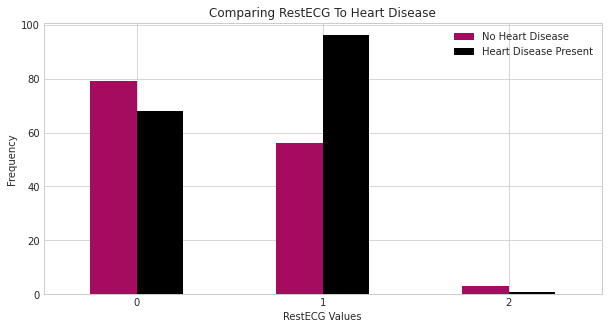

In [20]:
pd.crosstab(df.restecg, df.target).plot(kind='bar', 
                                   figsize=(10, 5), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing RestECG To Heart Disease")
plt.xlabel("RestECG Values")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

The vast majority of the patients with ST elevation or depression greater than 0.05 mV are seen to have heart disease compared to others with normal `restecg` values. 

## 3. MODELING

For this problem we're going to use the independent variables: `age`, `sex`, `cp`, `trestbps`, `chol`, `fbs `, `restecg`, `thalach `, `exang`, `oldpeak`, `slope`, `ca`, and `thal`, to predict the dependent variable: `target`. 

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">3.1. DATA SPLIT</h4>

First, we'll start by splitting our data into `X` (independent variable) and `y`( dependent variable).

In [21]:
X = df.drop("target", axis = 1) #Every other column but the target
y = df["target"]

In [22]:
# Let's visualize X

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Now we're going to split our data into a `training` and `test` set using `sklearn` train set split.

In [24]:
#save the state of random function
np.random.seed(42) 

#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
#View the length of X_train and y_train

len(X_train), len(y_train)

(242, 242)

In [26]:
#View the length of X_test and y_test

len(X_test), len(y_test)

(61, 61)

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">3.2. CHOOSING OUR MACHINE LEARNING MODEL</h4>

Let's choose our model, which we will train to find the patterns on the training set and then use the patterns on the test set. Since this is a classification problem, we are going to try 2 different ML models:<br>

`LogisticRegression`, and <br>
`RandomForestClassifier`.

Since all the algorithms in the Sklearn library uses the same functions for fitting and scoring a model, let's instantiate each model in a dictionary and create a function to fit and score them.

In [27]:
# Put them in a dict
models = {"Logistic Regression": LogisticRegression(max_iter=3000),
         "Random Forest CLF": RandomForestClassifier()}

log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create function to fit and score them
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Save the state of random function
    np.random.seed(42)
    
    # Create an empty dict called model_scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'Random Forest CLF': 0.8360655737704918}

We can see that the Logistic Regression Model did a better job at predicting heart disease. However, let's have a better comparison using a bar chart.

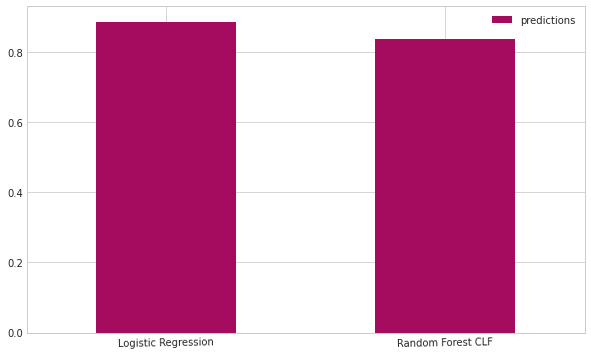

In [29]:
model_viz = pd.DataFrame(model_scores, index=['predictions'])
model_viz.T.plot.bar(rot=1, figsize=(10, 6), color=["#a50b5e"]);

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">3.3. HYPERPARAMETER TUNING AND CROSS-VALIDATION</h4>

Let's change the hyperparameters of our models to see if we can get a better result. After that, we'll perform a cross-validation, since we we have a limited data sample. 

**TUNING WITH RandomizedSearchCV**<br> 
We'll start by using `RandomizedSearchCV` to tune our `LogisticRegression` model but first, let's create a hyperparameter grid (i.e. a dict of different hyperparameters) for each and then test them out.

In [30]:
# For LogisticRegression hyperparameters
lr_grid = {"C": np.logspace(-5, 5, 20),
               "solver": ["liblinear"]}

# For RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Let's tune our LogisticRegression model using RandomizedSearchCV

In [31]:
np.random.seed(42)

rs_lr = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=lr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
# Find the best params
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.1623776739188721}

In [33]:
print(f'Test Score Using RSCV on LR: {rs_lr.score(X_test, y_test)}')

Test Score Using RSCV on LR: 0.8852459016393442


Let's tune our RandomForestClassifier model using RandomizedSearchCV

In [34]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [36]:
print(f'Test Score Using RSCV on RF: {rs_rf.score(X_test, y_test)}')

Test Score Using RSCV on RF: 0.8688524590163934


Here we can see a much better result in the `RandomForestClassifier` when we tuned it using the `RandomizedSearchCV`. However, since the `Logistic Regression` Model is still doing better, we will push on with it. So, let's try tuning our Logistic Regression Model using `GridSearchCV`. 

**TUNING WITH GridSearchCV**<br>
In contrast to RandomSearchCV, which tries random combinations of a range of values, GridSearchCV tries **every** possible combination of the current list of hyper-parameter values and selects the best combination based on the cross validation score. The best hyper-parameters are often obtained using GridSearchCV, despite the longer fitting time [Reference](https://www.kaggle.com/general/212697).

In [37]:
# Different LogisticRegression hyperparameters
lr_grid = {"C": np.logspace(-5, 10, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=lr_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [38]:
gs_lr.best_params_

{'C': 0.1373823795883264, 'solver': 'liblinear'}

In [39]:
 print(f'Test Score Using GS on LR: {gs_lr.score(X_test, y_test)}')

Test Score Using GS on LR: 0.8852459016393442


The score remains thesame as when we tuned it using `RandomSearchCV`. I'm guessing because we only tried with 20 different combinations. More combinations might have given a better result but it would take a longer time to fit. 

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">3.4. CLASSIFIER MODEL EVALUATION</h4>

Since we've tried to find the best hyperparameters using RandomizedSearchCV and GridSearchCv, let's use a few more evaluation metrics such as: `confusion matrix`, `ROC curve and AUC score`, `Recall`, `Classification Report`, `Precision`, and `F1-score`.

First, let's make predictions on the test data.

In [40]:
y_preds = gs_lr.predict(X_test)

In [41]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**AUC - ROC CURVE**<br>
This curve measures the performance for classification problems at various threshold settings. It reveals how well the model is capable of differentiating across classes. The closer the AUC score is to 1, the better. Here we'll use the RandomizedSearchCV version of our Logistic Regression estimator, `rs_lr` and the test data (`X_test` and `y_test`)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


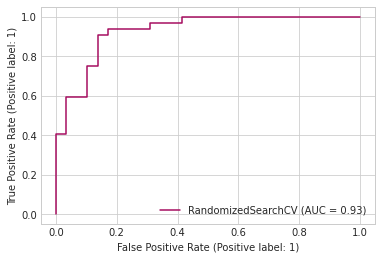

In [43]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_lr, X_test, y_test,color='#a50b5e');

Here we can see that the Logistic Regression did a good job at classifying the positive class in the dataset.<br>

**CONFUSION MATRIX**<br>
This will give us insight into the errors being made by our classifier as well as an insight into the types of errors that are being made.

In [44]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Let's visualize this using Seaborn's heatmap.

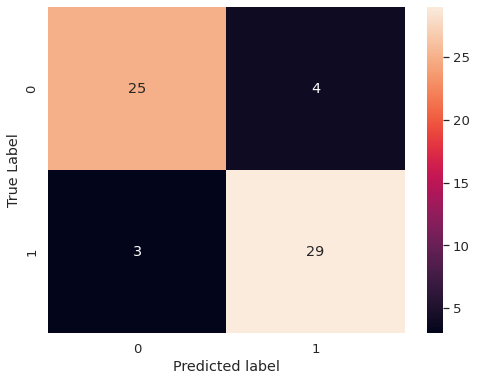

In [45]:
sns.set(font_scale=1.2) # Increase font size

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True,)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
       
plot_conf_mat(y_test, y_preds)

**True Positive** = 29 values were predicted correctly by the model<br>
**False Positive** = 4 values were wrongly predicted<br>
**True Negative** = 25 values of no heart disease were predicted correctly by the model<br>
**False Negative** = 3 values were predicted as no heart disease<br>

**CLASSIFICATION REPORT: PRECISION, RECALL, F1-SCORE, SUPPORT**<br>
This is one of the performance evaluation metrics of a classification model that displays the model's accuracy, precision, recall, F1 score and support. Since we already imported the classification report, let's visualize them by passing it the true labels and our predicted labels. 

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



However, these values were only calculated using on one test split. Let's recalculate this using `Cross Validation`.

**CROSS VALIDATION**<br>
Now we'll use `cross_val_score()` to calculate the accuracy, precision, recall, and f1-score of our model. To do that, let's start by checking our best hyperparameters.

In [47]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.1623776739188721}

Next, let's create a new classifier with the best parameter.

In [48]:
clf = LogisticRegression(C=0.1623776739188721,
                        solver="liblinear")

In [49]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc) # Mean accuracy
print("Cross-Validated Accuracy: ", cv_acc)

Cross-Validated Accuracy:  0.8446994535519124


In [50]:
# Cross-validated precision

cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec) # Mean precision
print("Cross-Validated Precision: ", cv_prec)

Cross-Validated Precision:  0.8207936507936507


In [51]:
# Cross-validated recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall) # Mean recall
print("Cross-Validated Recall: ", cv_recall) 

Cross-Validated Recall:  0.9212121212121213


In [52]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1) # Mean f1-score
print("Cross-Validated f1-score: ", cv_f1)

Cross-Validated f1-score:  0.8673007976269721


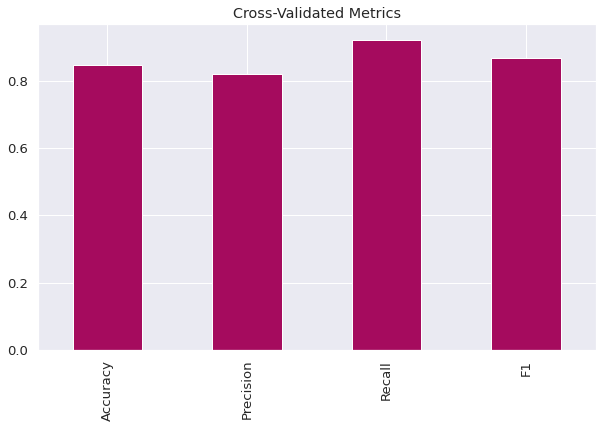

In [53]:
# Let's visualize our cross-validated metrics

# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_prec,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(figsize=(10, 6), title="Cross-Validated Metrics", 
                      color=["#a50b5e"], legend=False);

<h4 style="background-color:black;color:white;border-radius: 8px; padding:12px">3.5. FEATURE IMPORTANCE</h4>

Lastly, it is important to know which independent variable contributed the most to the prediction we got from the logisitic regression model. In other words, what feature is of utmost importance. This is important because it will give us better interpretability of the data. 

To do this, we'll obtain the importance from coefficients, since they are already assigned to each input value.

In [54]:
#Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.1623776739188721,
                        solver="liblinear")

clf.fit(X_train, y_train);
clf.coef_

# match them to their features 

features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.002167276101024299,
 'sex': -0.7820482906850159,
 'cp': 0.6349998740285191,
 'trestbps': -0.01153992507013827,
 'chol': -0.0015939793120857912,
 'fbs': 0.036561718891990204,
 'restecg': 0.278802224000687,
 'thalach': 0.024355504042690795,
 'exang': -0.5555167509845584,
 'oldpeak': -0.5552793607752335,
 'slope': 0.4151253759941754,
 'ca': -0.6096217933350034,
 'thal': -0.6403036092065465}

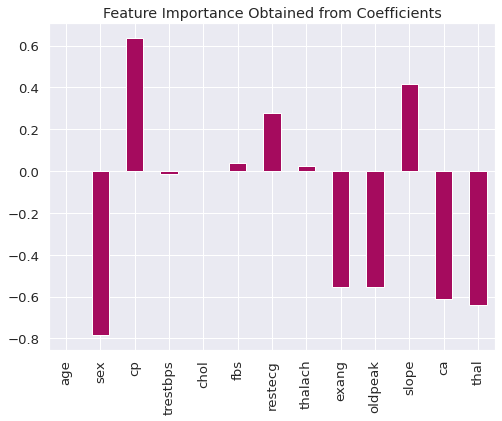

In [55]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance Obtained from Coefficients", 
                       figsize=(8, 6), color=["#a50b5e"], legend=False);


Here we can clearly see that the independent variables that contributed the most to the prediction we got from the logisitic regression model are: `sex`, `cp`, `restecg`, `exang`, `oldpeak`, `slope`, `ca`, and `thal`. 

Features like: `age`, `trestbps`, `chol`, `fbs`, and `thalach` did not contribute much to the patterns the model found.

## 4. CONCLUSION

* In this notebook, we explored a binary classification problem, using a dataset made available by **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease)** from the Cleveland database. Our goal was to reach an accuracy of 96% at predicting whether or not someone has heart disease but we only got about 89% accuracy using the **Logistic Regression Model.**<br>
* The Logistic Regression model did a fairly good job at predicting which patient has heart diseases or not. However, a lot can still be done to improve on our accuracy score.<br> 
* Some biases where observed during EDA. For example, patients whose chest pain are not heart-related were seen to have the highest number of participants with heart disease compared to the rest. This could have been as a result of misdiagnosis. In this regard, more data would suffice.<br>
* Perhaps we could try a better model in the future.